# Ejercicio 3

Nombres: Celeste Gallardo, Jesua Villacis

In [ ]:
import numpy as np

# Definir la función sinc(x), evitando división por cero
def f(x):
    return np.sinc(x / np.pi)  # sinc(x) = sin(x)/x

xs = np.linspace(0.1, 8, 100) 
ys = [f(x) for x in xs]

In [50]:
# Definir la cota
cota = 0.015

# Definir una función auxiliar g(x) = f(x) - cota
def g(x):
    return f(x) - cota

# Método de bisección para encontrar el valor x_T
def biseccion(a, b, tol=1e-6, max_iter=1000):
    if g(a) * g(b) >= 0:
        print("No se cumple g(a)*g(b) < 0. Elige otro intervalo.")
        return None
    for _ in range(max_iter):
        c = (a + b) / 2
        if abs(g(c)) < tol or (b - a)/2 < tol:
            return c
        if g(a) * g(c) < 0:
            b = c
        else:
            a = c
    print("No se encontró raíz con la tolerancia dada.")
    return None

# Buscar el valor x_T
xT = biseccion(3.06006, 3.10911)
print(f"Valor aproximado de x_T donde f(x) < {cota}: {xT:.6f}")


Valor aproximado de x_T donde f(x) < 0.015: 3.095147


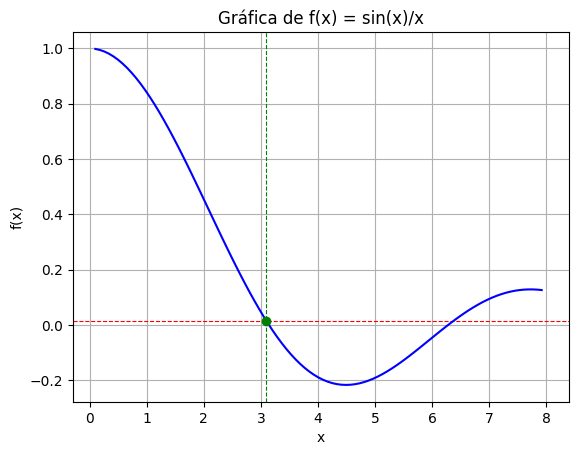

In [51]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

fig  = plt.subplots()
plt.plot(xs, ys, color='white', lw=0.5) 
plt.title('Gráfica de f(x) = sin(x)/x')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()
plt.axhline(cota, color='red', lw=0.8, ls='--', label=f'f(x) = {cota}')
plt.axvline(xT, color='green', lw=0.8, ls='--', label=f'x_T ≈ {xT:.2f}')
line, = plt.plot([], [], color='blue', label='f(x)')
point, = plt.plot([], [], 'go')

# Funciones de animación
def init():
    line.set_data([], [])
    point.set_data([], [])
    return line, point

def update(frame):
    xdata = xs[:frame]
    ydata = ys[:frame]
    line.set_data(xdata, ydata)
    if xs[frame - 1] >= xT:
        point.set_data([xT], [f(xT)])
    return line, point

# Crear animación
ani = animation.FuncAnimation(fig[0], update, frames=len(xs), init_func=init, blit=True, repeat=False)

# Guardar como GIF
ani.save("grafica_Alg3.gif", writer="pillow", fps=30)

# Mostrar en Jupyter (si se desea)
HTML(ani.to_jshtml())